## Basic Python Programming 002 numpy

#### Create an empty numpy array and fill in train datas

In [158]:
import pdb # for debugging
import os, glob
import numpy as np
import pandas as pd
import csv

path_to_train_2d_datasets = os.path.join('..','001 csv','outputs','train','*.csv')
train_2d_files = glob.glob(path_to_train_2d_datasets)

# We already know that the width and height of the 2D MNIST dataset is 28.
train_datas = np.empty((len(train_2d_files),28,28))
train_labels = np.empty((len(train_2d_files),1))

for data_idx, data_path in enumerate(train_2d_files):
    # Read the csv and replace the elements
    # df = pd.read_csv(data_path)
    train_labels[data_idx] = data_path[26]
    with open(data_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for i, row in enumerate(reader):
            for j, item in enumerate(row):
                train_datas[data_idx, i, j] = item

In [159]:
print(train_labels.shape)
print(train_datas.shape)

(60000, 1)
(60000, 28, 28)


In [160]:
path_to_test_2d_datasets = os.path.join('..','001 csv','outputs','test','*.csv')
test_2d_files = glob.glob(path_to_test_2d_datasets)

# We already know that the width and height of the 2D MNIST dataset is 28.
test_datas = np.empty((len(test_2d_files),28,28))
test_labels = np.empty((len(test_2d_files),1))

for data_idx, data_path in enumerate(test_2d_files):
    # Read the csv and replace the elements
    # df = pd.read_csv(data_path)
    test_labels[data_idx] = data_path[25]
    with open(data_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for i, row in enumerate(reader):
            for j, item in enumerate(row):
                test_datas[data_idx, i, j] = item

In [161]:
print(test_labels.shape)
print(test_datas.shape)

(10000, 1)
(10000, 28, 28)


#### concatenate train and test datas

In [162]:
datas = np.concatenate((train_datas, test_datas), axis = 0)
labels = np.concatenate((train_labels, test_labels), axis = 0)

# shuffle datas and labels in same order
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

unison_shuffled_copies(datas, labels);

check whether label and data matches

9


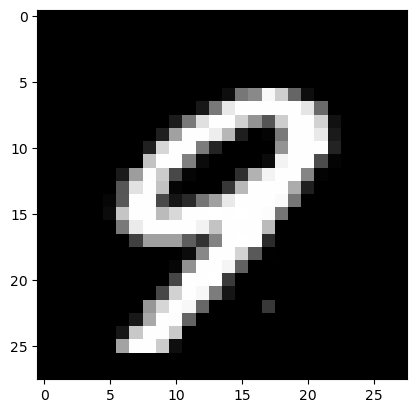

In [163]:
import matplotlib.pyplot as plt
plt.imshow(datas[1], cmap='gray');
print(int(labels[1]))

#### Split the numpy array into train, validation, and test arrays. Each array has a raio of 7:2:1 resepectively.

In [164]:
train_X, valid_X, test_X, _ = np.split(datas, [70000*7//10,70000*9//10,70000*10//10], axis=0)
train_y, valid_y, test_y, _ = np.split(labels, [70000*7//10,70000*9//10,70000*10//10], axis=0)

In [165]:
print('train_X:', train_X.shape)
print('valid_X:', valid_X.shape)
print('test_X:', test_X.shape)
print('train_y:', train_y.shape)
print('valid_y:', valid_y.shape)
print('test_y:', test_y.shape)


train_X: (49000, 28, 28)
valid_X: (14000, 28, 28)
test_X: (7000, 28, 28)
train_y: (49000, 1)
valid_y: (14000, 1)
test_y: (7000, 1)


#### Save and load files with npz

In [169]:
path_to_save = os.path.join("train_X.npz")
np.savez(path_to_save, train_X=train_X)

path_to_save = os.path.join("train_y.npz")
np.savez(path_to_save, train_y=train_y)

path_to_save = os.path.join("valid_X.npz")
np.savez(path_to_save, valid_X=valid_X)

path_to_save = os.path.join("valid_y.npz")
np.savez(path_to_save, valid_y=valid_y)

path_to_save = os.path.join("test_X.npz")
np.savez(path_to_save, test_X=test_X)

path_to_save = os.path.join("test_y.npz")
np.savez(path_to_save, test_y=test_y)